In [1]:
#importing libraries and dataset

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score,
    recall_score, classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import joblib



data = pd.read_csv("adult 3.csv")

In [2]:
#first 5 rows
data.head()  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#shape of dataset
data.shape 

(48842, 15)

In [4]:
data.isna().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [6]:
data.occupation.replace({'?': 'Others'}, inplace=True)
data.workclass.replace({'?': 'NotListed'}, inplace=True)

In [7]:
data.head(12)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NotListed,227026,HS-grad,9,Never-married,Others,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [8]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data = data[data['education'] != '5th-6th']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != 'Preschool']

In [9]:
data.drop(columns=['education'], inplace=True)

In [10]:
data.head(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NotListed,227026,9,Never-married,Others,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


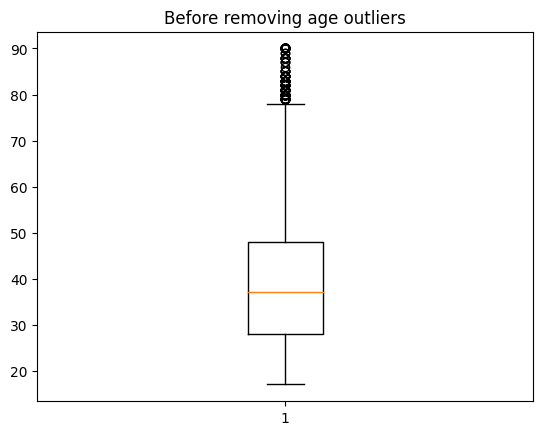

In [11]:
plt.boxplot(data['age'])
plt.title("Before removing age outliers")
plt.show()

data = data[(data['age'] >= 15) & (data['age'] <= 75)]

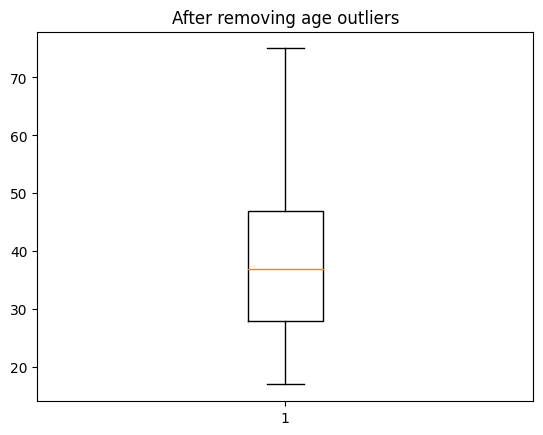

In [12]:
plt.boxplot(data['age'])
plt.title("After removing age outliers")
plt.show()

In [13]:
print(data.info())          

<class 'pandas.core.frame.DataFrame'>
Index: 47619 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47619 non-null  int64 
 1   workclass        47619 non-null  object
 2   fnlwgt           47619 non-null  int64 
 3   educational-num  47619 non-null  int64 
 4   marital-status   47619 non-null  object
 5   occupation       47619 non-null  object
 6   relationship     47619 non-null  object
 7   race             47619 non-null  object
 8   gender           47619 non-null  object
 9   capital-gain     47619 non-null  int64 
 10  capital-loss     47619 non-null  int64 
 11  hours-per-week   47619 non-null  int64 
 12  native-country   47619 non-null  object
 13  income           47619 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.4+ MB
None


In [14]:
print(data.describe())  

                age        fnlwgt  educational-num  capital-gain  \
count  47619.000000  4.761900e+04     47619.000000  47619.000000   
mean      38.230664  1.891430e+05        10.217602   1088.869191   
std       13.199351  1.054218e+05         2.377677   7495.382659   
min       17.000000  1.228500e+04         4.000000      0.000000   
25%       28.000000  1.173595e+05         9.000000      0.000000   
50%       37.000000  1.778580e+05        10.000000      0.000000   
75%       47.000000  2.366960e+05        13.000000      0.000000   
max       75.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  47619.000000    47619.000000  
mean      87.912619       40.564733  
std      403.193640       12.304123  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [15]:
print(data['workclass'].value_counts())

workclass
Private             33089
Self-emp-not-inc     3744
Local-gov            3089
NotListed            2639
State-gov            1973
Self-emp-inc         1659
Federal-gov          1426
Name: count, dtype: int64


In [16]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6129
Exec-managerial      6024
Craft-repair         5990
Adm-clerical         5559
Sales                5442
Other-service        4715
Machine-op-inspct    2869
Others               2639
Transport-moving     2294
Handlers-cleaners    1975
Tech-support         1444
Farming-fishing      1353
Protective-serv       973
Priv-house-serv       198
Armed-Forces           15
Name: count, dtype: int64


In [17]:
print(data['income'].value_counts())  

income
<=50K    36029
>50K     11590
Name: count, dtype: int64


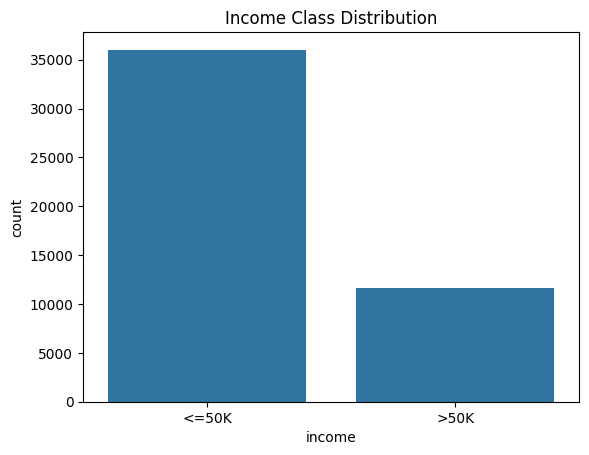

In [18]:
sns.countplot(data=data, x='income')
plt.title('Income Class Distribution')
plt.show()

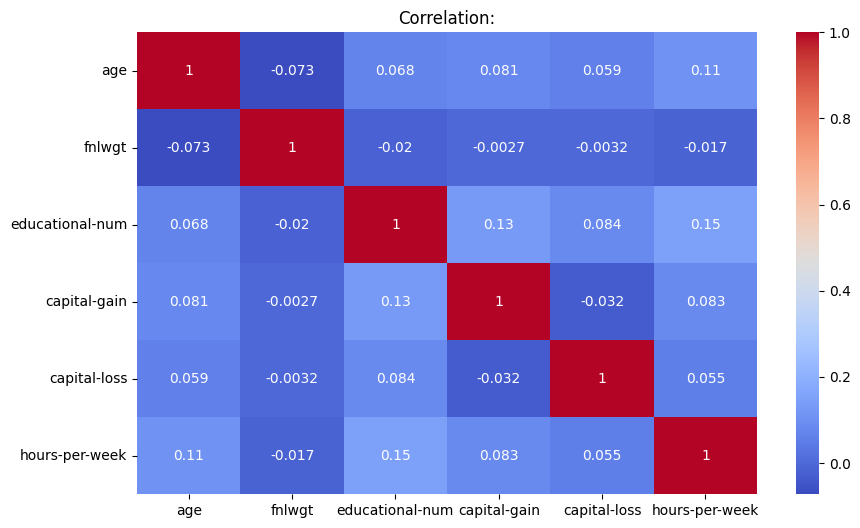

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation:")
plt.show()

In [20]:
# label encoder

import joblib
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include='object').columns

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
    joblib.dump(le, f"{col}_.pkl")


In [21]:
# train test split and model training

x = data.drop(columns=['income'])

y = data['income']

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)

In [22]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()}

In [23]:
# Evaluation

results = []
model_predictions = {}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)

    model_predictions[name] = preds

    acc = accuracy_score(ytest, preds)
    f1 = f1_score(ytest, preds)
    prec = precision_score(ytest, preds)
    rec = recall_score(ytest, preds)


    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec,
        'Trained Model': model
    })

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df[['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']])


                    Model  Accuracy  F1 Score  Precision    Recall
4       Gradient Boosting  0.860038  0.676692   0.772853  0.601812
1           Random Forest  0.848383  0.665586   0.718500  0.619931
3  Support Vector Machine  0.841873  0.621988   0.743697  0.534513
2     K-Nearest Neighbors  0.816779  0.603679   0.637410  0.573339
0     Logistic Regression  0.819719  0.543230   0.708536  0.440466


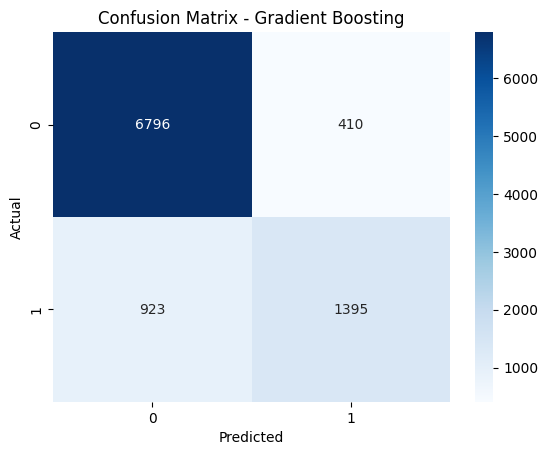

In [24]:

best_row = results_df.iloc[0]
best_model_name = best_row['Model']
best_model = best_row['Trained Model']
best_preds = model_predictions[best_model_name]

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, best_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


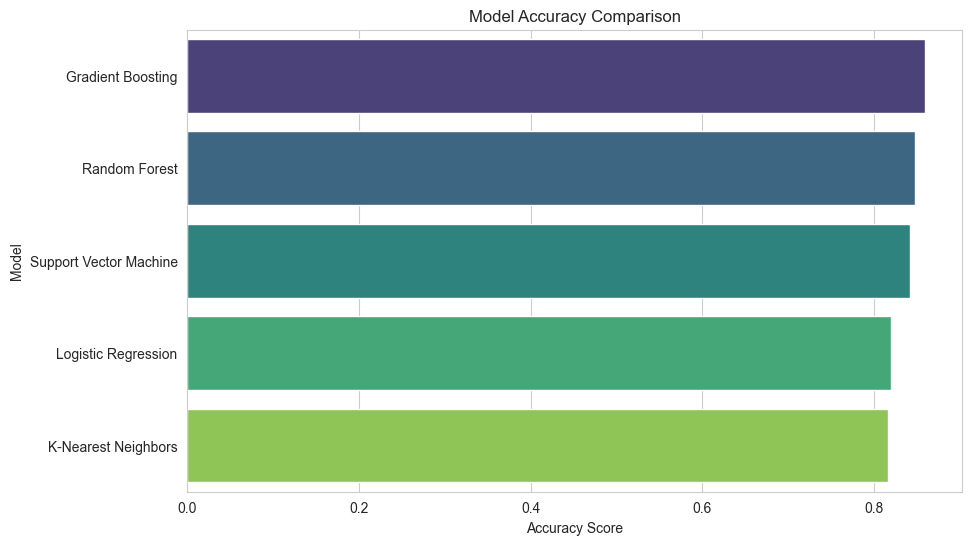

In [28]:
#model comparsion

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='viridis')

plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()


In [26]:
#best model
best_row = results_df.iloc[0]
best_model = best_row['Trained Model']
print(f"\nBest Model: {best_row['Model']}")


Best Model: Gradient Boosting


In [27]:
#save model
joblib.dump(best_model, 'best_salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']